# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Planar Array Antennas
***

An extension of the linear array antenna is the planar arrays.  Planar arrays are formed by placing the radiating elements in a grid and may take on various configurations, as shown in Figure 3.15.  Planar arrays are much more versatile than single radiating elements and linear arrays.  Planar arrays are used to scan the main lobe to any point in space, have lower sidelobes, may have more symmetrical patterns, and have many applications in search and tracking radars, remote sensing, and communications. Referring to Figure 3.19, the array factor for a rectangular planar array is written as (Equation 3.146)

$$
	{AF} = \sum\limits_{m=1}^{M} \sum\limits_{n=1}^{N} a_{mn}\,e^{j(m-1)(k\, d_x \sin\theta\, \cos\phi + \alpha_x)}\, e^{j(n-1)(k\, d_y \sin\theta\, \sin\phi + \alpha_y)},
$$

The main lobe of the planar array may be steered to any point in space.  To have a single main beam directed toward ($\theta_0, \phi_0$), the progressive phase shift between each element in the $x$ and $y$ directions is given by

$$
	\alpha_x = -k\, d_x \sin\theta_0 \cos\phi_0, \hspace{0.2in} 
    \alpha_y = -k\, d_y \sin\theta_0 \sin\phi_0 \hspace{0.5in} \text{(rad)}.
$$

Window functions are also applied to planar arrays in a similar fashion as the linear arrays.  For the planar case, a window function is applied in the $x$  and $y$ directions.  The window function for the two directions may or may not be identical, depending on the requirements.  For a rectangular planar array, using window functions in both the $x$  and $y$ directions results in very small coefficients in the corner areas of the array.  Therefore, these elements are often not included in the design of the array.  Typically, a circular or elliptical boundary is specified and elements outside this boundary are not used, as shown in Figure 3.20.
***

Begin by getting the library path

In [1]:
import lib_path

Set the frequency (Hz), number of elements in the ***x*** and ***y*** directions, the element spacing in the ***x*** and ***y*** directions (m), the scan angle in theta direction (degrees) and the scan angle in the phi direction (degrees)

In [2]:
frequency = 300e6

number_of_elements_x = 11

number_of_elements_y = 21

element_spcaing_x = 0.5

element_spcaing_y = 0.25

scan_angle_theta = 30.0

scan_angle_phi = 45.0

Set up the theta and phi arrays using the `linspace` and `meshgrid` routines from `scipy`

In [3]:
from numpy import linspace, meshgrid, finfo, radians

from scipy.constants import pi

n = 400

m = int(n / 4)

theta, phi = meshgrid(linspace(finfo(float).eps, 0.5 * pi, n), linspace(finfo(float).eps, 2.0 * pi, n))

Set up the keyword args

In [4]:
kwargs = {'number_of_elements_x': number_of_elements_x,

          'number_of_elements_y': number_of_elements_y,

          'element_spacing_x': element_spcaing_x,

          'element_spacing_y': element_spcaing_y,

          'scan_angle_theta': radians(scan_angle_theta),

          'scan_angle_phi': radians(scan_angle_phi),

          'frequency': frequency,

          'theta': theta,
          
          'phi': phi}

Calculate the array factor for the planar uniform array using the `planar_uniform` routines

In [5]:
from Libs.antenna.array import planar_uniform

af, psi_x, psi_y = planar_uniform.array_factor(**kwargs)

Display the antenna pattern using the `matplotlib` routines

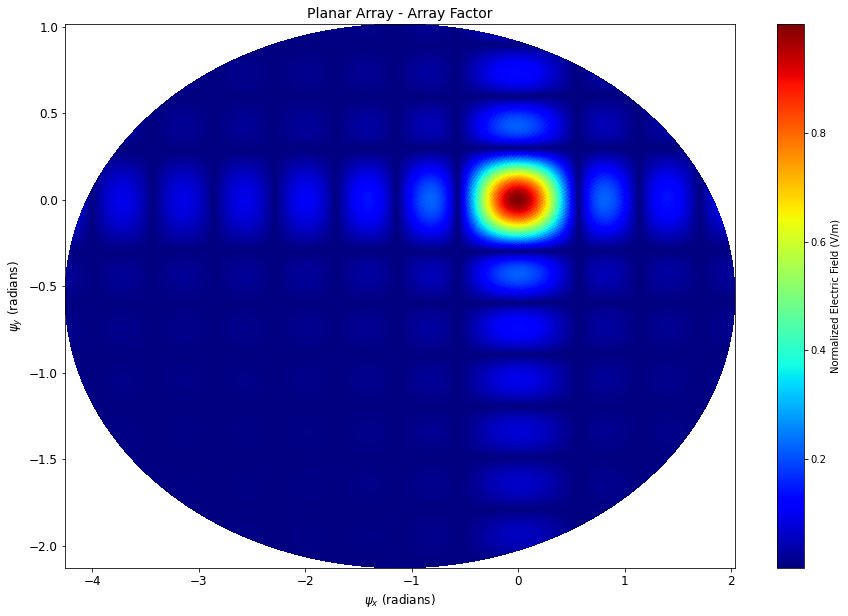

In [6]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Set up the axes

fig, axes1 = plt.subplots()



# Create the pcolor plot

im = axes1.pcolor(psi_x, psi_y, abs(af), cmap="jet")

cbar = fig.colorbar(im, ax=axes1, orientation='vertical')

cbar.set_label("Normalized Electric Field (V/m)", size=10)



# Set the x- and y-axis labels

axes1.set_xlabel('$\psi_x$ (radians)', size=12)

axes1.set_ylabel('$\psi_y$ (radians)', size=12)


# Set the plot title and labels

axes1.set_title('Planar Array - Array Factor', size=14)



# Set the tick label size

axes1.tick_params(labelsize=12)

Create the contour plot

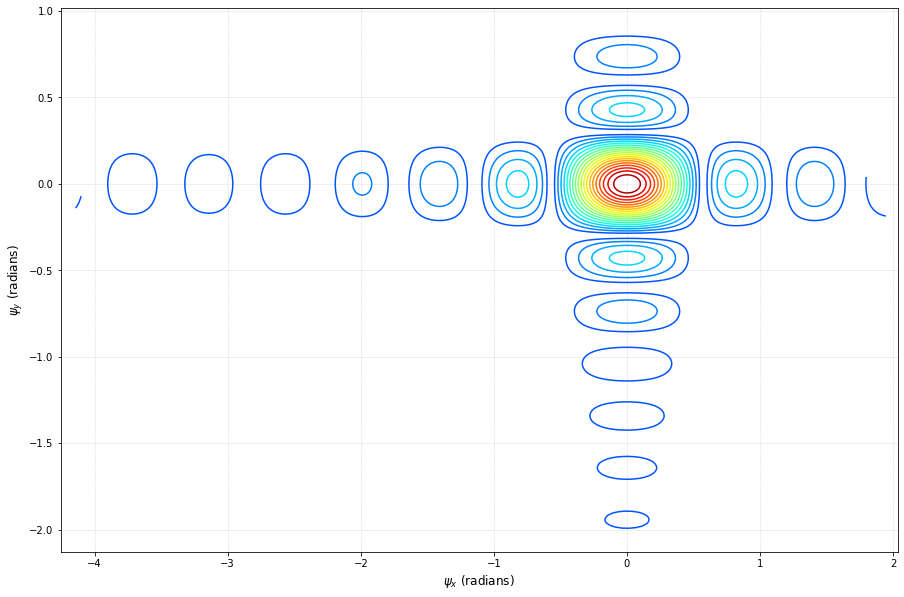

In [7]:
plt.contour(psi_x, psi_y, abs(af), 20, cmap="jet", vmin=-0.2, vmax=1.0)


# Set the x- and y-axis labels

plt.xlabel('$\psi_x$ (radians)', size=12)

plt.ylabel('$\psi_y$ (radians)', size=12)


# Set the plot title and labels

axes1.set_title('Planar Array - Array Factor', size=14)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

Create the line plot

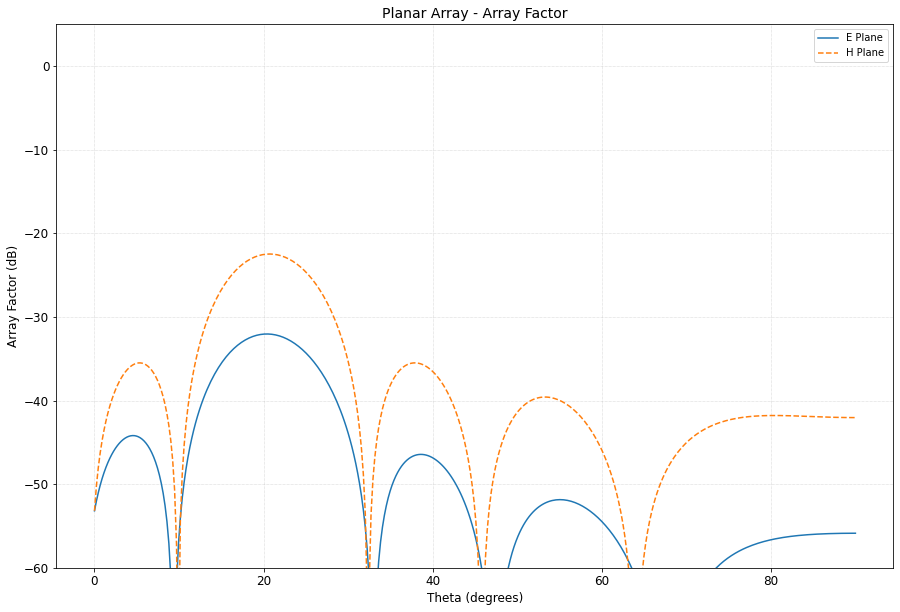

In [8]:
from numpy import degrees, log10


plt.plot(degrees(theta[0]), 20.0 * log10(abs(af[m])), '', label='E Plane')

plt.plot(degrees(theta[0]), 20.0 * log10(abs(af[0])), '--', label='H Plane')



# Set the y axis limit

plt.ylim(-60, 5)



# Set the x and y axis labels

plt.xlabel('Theta (degrees)', size=12)

plt.ylabel('Array Factor (dB)', size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Place the legend

plt.legend(loc='upper right', prop={'size': 10})



# Set the plot title and labels

plt.title('Planar Array - Array Factor', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)